### Heart Disease Dataset


Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns
import plotly.express as px
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
# conda install mlxtend --channel conda-forge

In [3]:
# reading in the dataset

df = pd.read_csv('archive.zip',)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
# inspecting the shape of the dataframe
# We don't have any missing values 

print(f"Rows: {df.shape[0]}")
print(f"Cols: {df.shape[1]}")
print(f"Features:\n {df.columns.to_list()}\n")
print(f"Missing values: {df.isna().values.sum()}")
print(f"Unique values:\n {df.nunique()}\n")

Rows: 303
Cols: 14
Features:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Missing values: 0
Unique values:
 age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64



In [5]:
# Let's see whatelse we can find

df.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
target    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

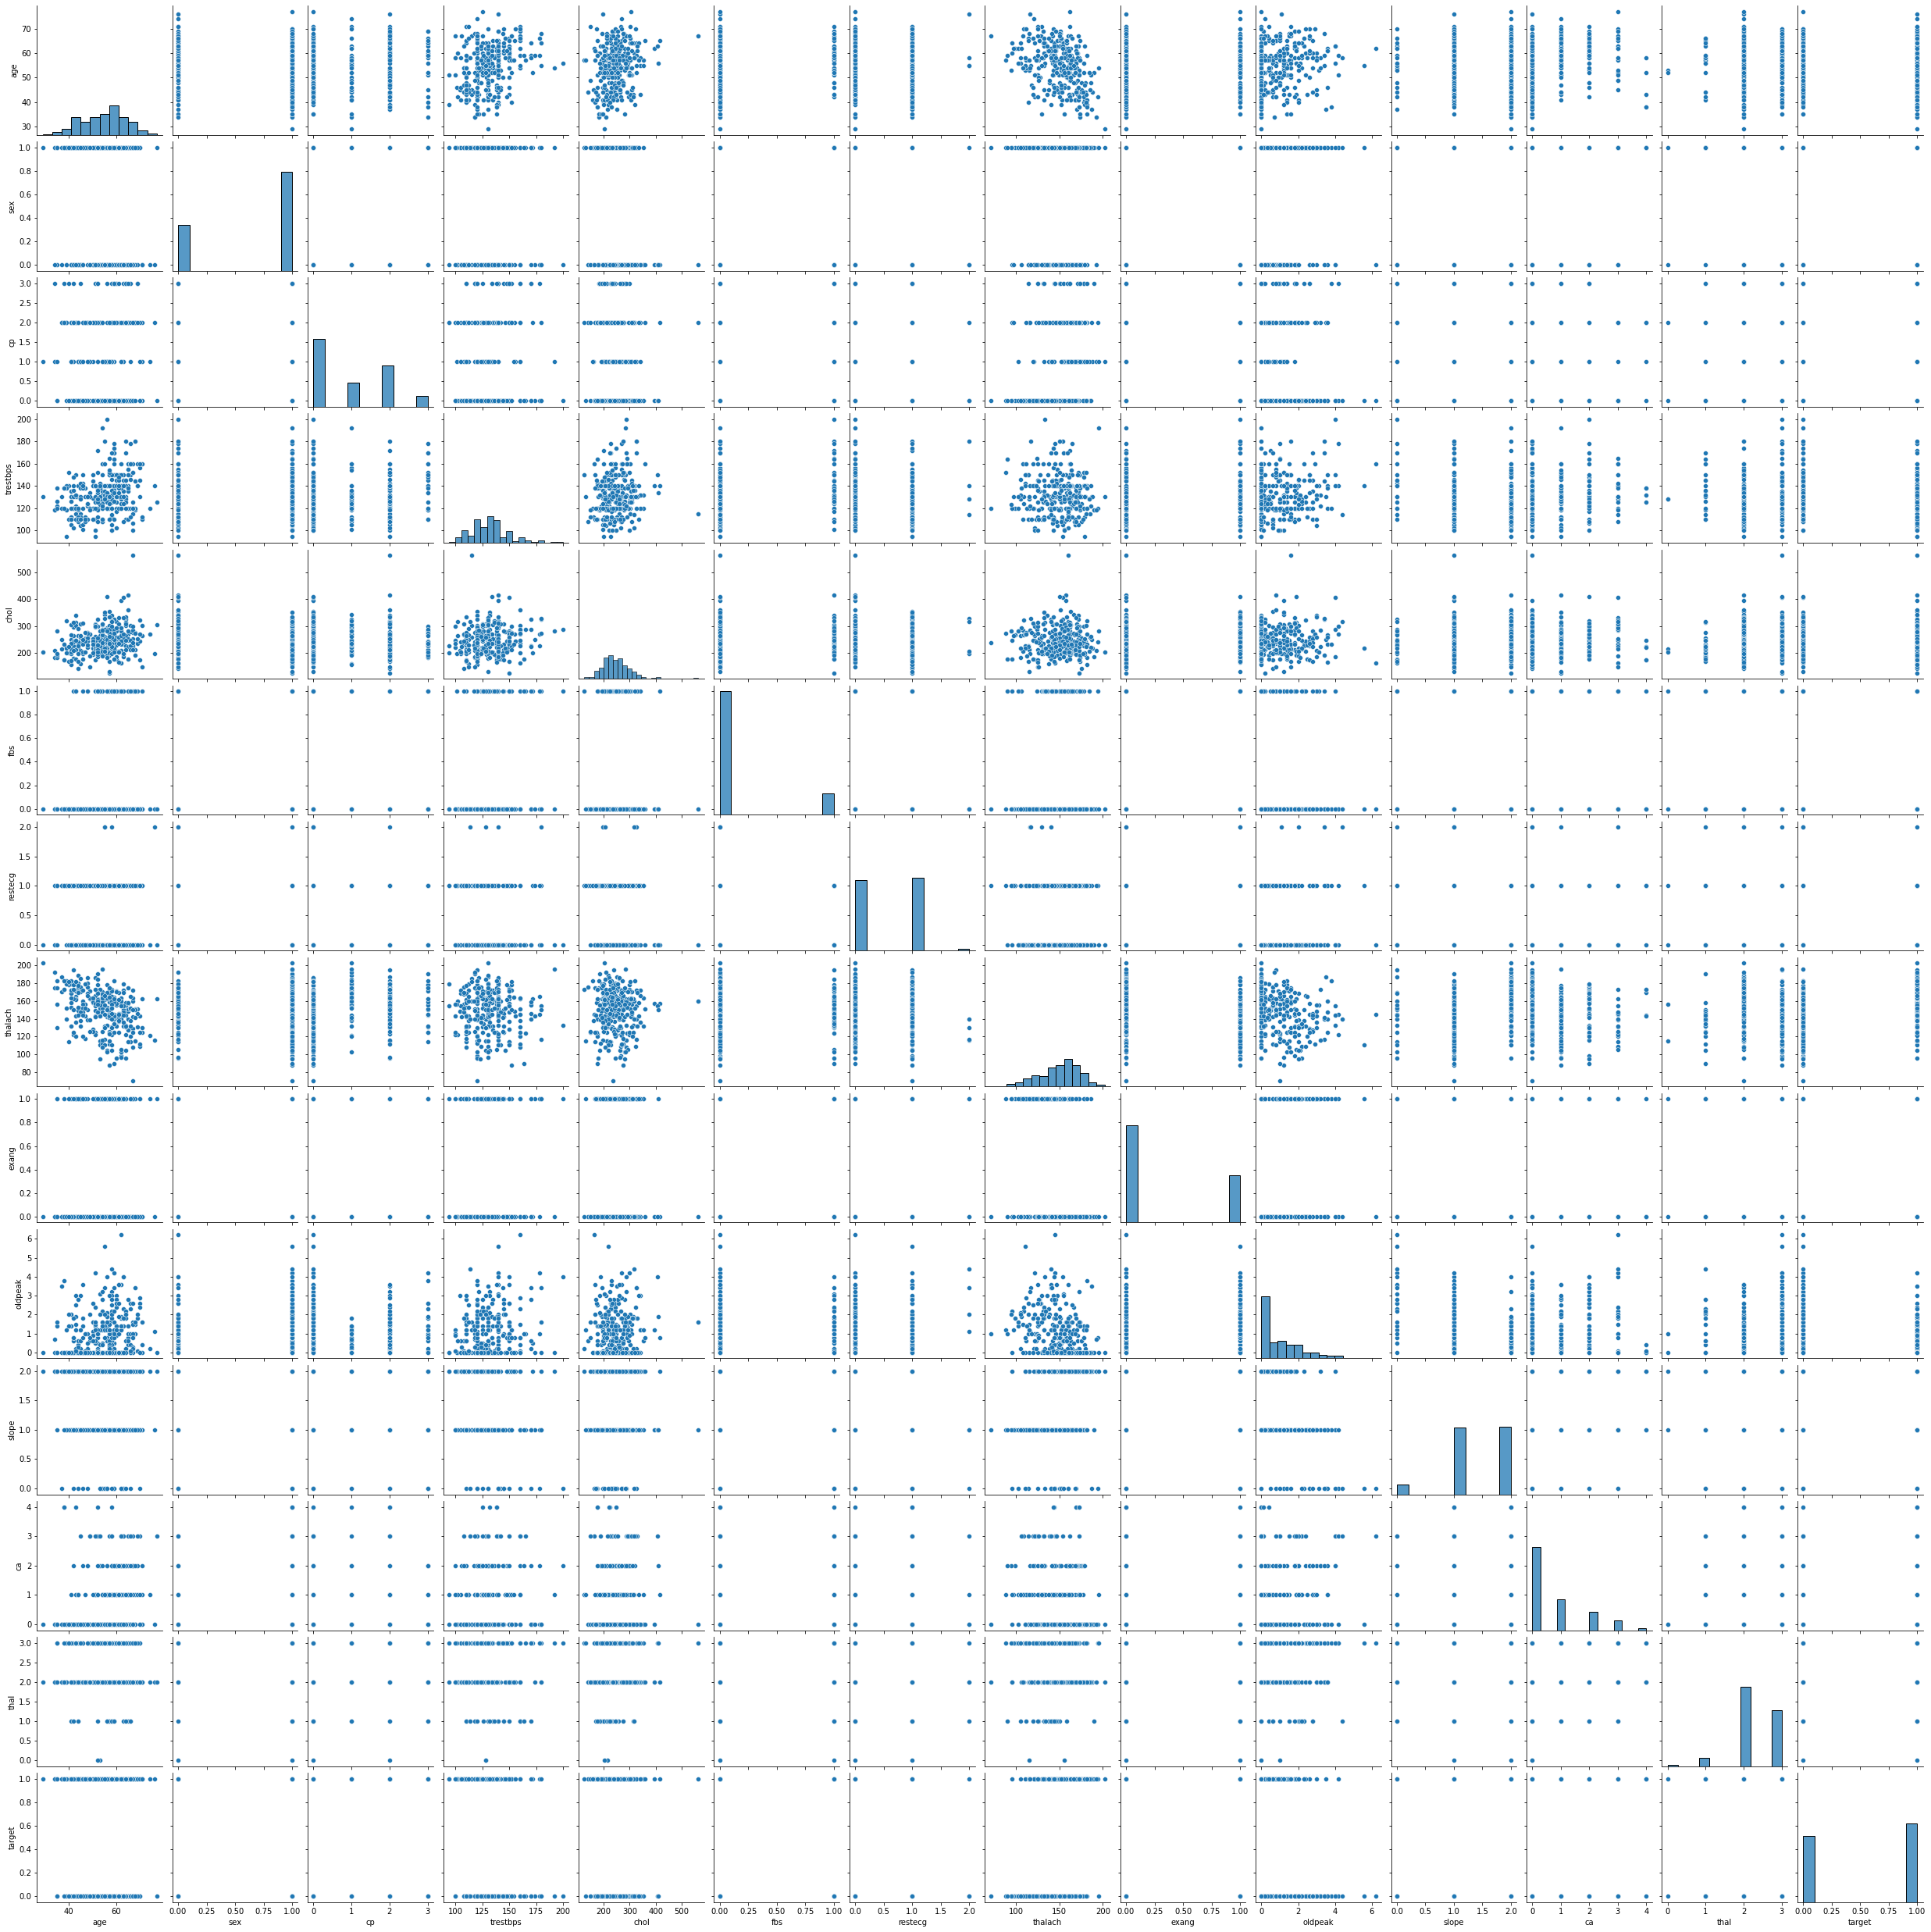

In [6]:
# correlation plots

sns.pairplot(df)
plt.show()

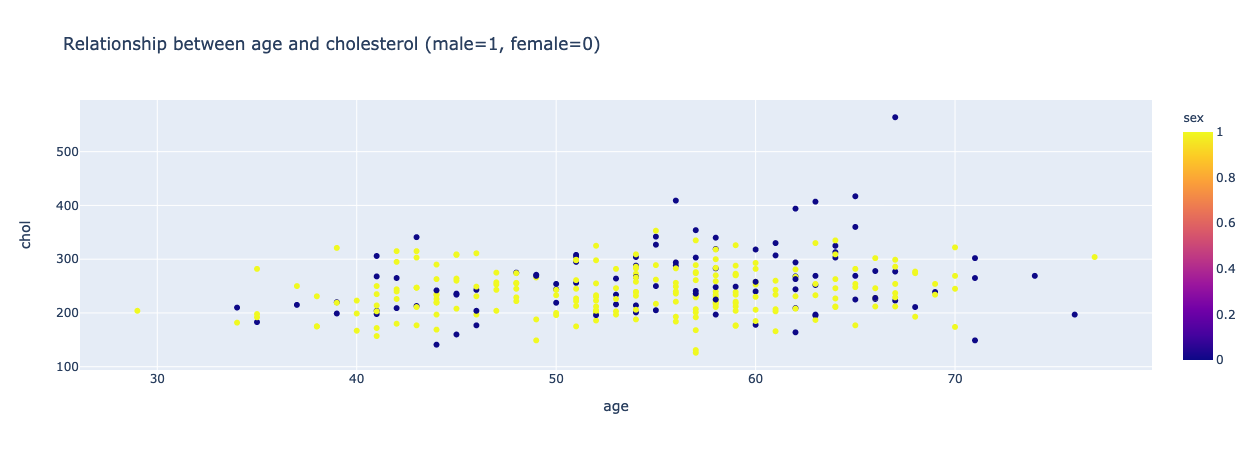

In [7]:
# Let's look at the relationship between age and cholesterol

fig = px.scatter(df, x="age", y="chol", color="sex", title="Relationship between age and cholesterol (male=1, female=0)")
fig.show()

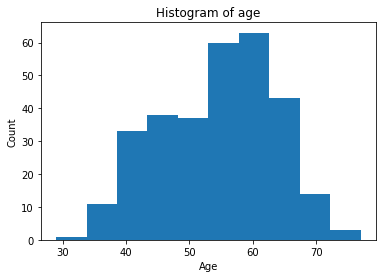

In [8]:
# distribution of age

plt.hist(df.age, bins=10)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of age")
plt.show()

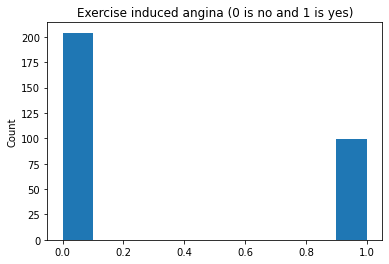

In [9]:
## 
plt.hist(df.exang)
plt.title("Exercise induced angina (0 is no and 1 is yes)")
plt.ylabel("Count")
plt.show()

In [10]:
## Preparing the features and labels

X = df.copy()

X.drop(labels=['target'], axis=1, inplace=True)
y = df['target']

In [42]:
## target distribtion
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [44]:
# looking at sample proportions 

heart_disease = 165
no_heart_disease = 130

proportion_of_heart_disease = heart_disease / (heart_disease + no_heart_disease)
print(f"Random guess accuracy: {proportion_of_heart_disease*100:.2f}%")

Random guess accuracy: 55.93%


In [11]:
## Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

In [13]:
## Stratifying to make sure we have ratio of examples in training set and test set

np.bincount(y_train) / y_train.shape[0], np.bincount(y_test) / y_test.shape[0]

(array([0.45588235, 0.54411765]), array([0.4516129, 0.5483871]))

In [14]:
## Let's run random forest since it is agnostic to feature scaling

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initializing the model
rf = RandomForestClassifier(oob_score=True)

# cross validation
cv_acc_rf = cross_val_score(estimator=rf, X=X_train,
                           y=y_train, cv=10, n_jobs=-1)


print(f'Kfold Accuracy: {np.mean(cv_acc_rf)*100:.2f}%')

Kfold Accuracy: 81.27%


In [15]:
# Accuracy results of each fold

cv_acc_rf

array([0.75      , 0.82142857, 0.77777778, 0.88888889, 0.7037037 ,
       0.88888889, 0.88888889, 0.92592593, 0.66666667, 0.81481481])

In [16]:
# train the model

rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [17]:
# predictions on the test set

predictions = rf.predict(X_test)

In [18]:
## Looking at confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, predictions)

print(f"Model accuracy of Random Forest: {accuracy_score(y_test, predictions)*100:.2f}%\n")
print(f"Confusion matrix:\n {cm}")
print(classification_report(y_test, predictions))

Model accuracy of Random Forest: 77.42%

Confusion matrix:
 [[11  3]
 [ 4 13]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.81      0.76      0.79        17

    accuracy                           0.77        31
   macro avg       0.77      0.78      0.77        31
weighted avg       0.78      0.77      0.77        31



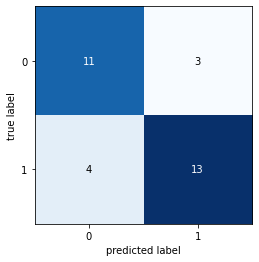

In [19]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [20]:
# Let's do some predictions. 
# first 10 data points from the test set

print(f"Predictions of Random Forest: {rf.predict(X_test.iloc[:10, :])}")
print(f"True labels: {y_test[:10].values}")

Predictions of Random Forest: [0 1 0 0 1 1 0 1 0 1]
True labels: [1 1 0 0 1 1 0 1 0 0]


In [21]:
# Out of bag score

rf.oob_score_

0.8088235294117647

In [22]:
# feature importance

rf.feature_importances_

array([0.08684372, 0.02906063, 0.13075568, 0.07601836, 0.07122807,
       0.0095469 , 0.01987136, 0.11923216, 0.05233907, 0.10427498,
       0.04626702, 0.13442826, 0.1201338 ])

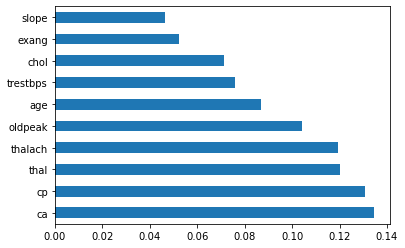

In [23]:
# plotting features the model found important from highest to low
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh');

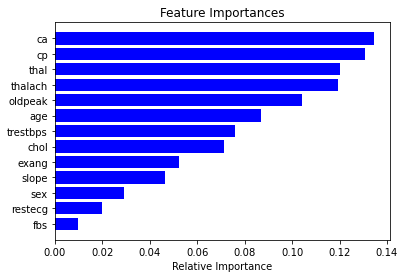

In [24]:
## Same as above 

features = X_train.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [25]:
## Lets drop the lowest 4 features and see how the score changes.

X_train_trimmed = X_train.drop(labels=["slope", "restecg", "fbs", "sex"], axis=1)
X_train_trimmed.head()

age  cp  trestbps  chol  thalach  exang  oldpeak  ca  thal
222   65   3       138   282      174      0      1.4   1     2
86    68   2       118   277      151      0      1.0   1     3
44    39   2       140   321      182      0      0.0   0     2
201   60   0       125   258      141      1      2.8   1     3
259   38   3       120   231      182      1      3.8   0     3

In [28]:
# initializing, training and scoring randomforest

rf_for_trimmed = RandomForestClassifier(oob_score=True)

cv_score_rf_trimmed = cross_val_score(estimator=rf_for_trimmed, X=X_train_trimmed, y=y_train,
                                      cv=10, n_jobs=-1)

print(f'Kfold Accuracy: {np.mean(cv_score_rf_trimmed)*100:.2f}%')


Kfold Accuracy: 81.26%


In [29]:
# trimming the test set to match the training set
X_test_trimmed = X_test.drop(labels=["slope", "restecg", "fbs", "sex"], axis=1)

In [30]:
# evaluating the model with confusion matrix

rf_for_trimmed.fit(X_train_trimmed, y_train)

predictions_for_trimmed = rf_for_trimmed.predict(X_test_trimmed)


cm = confusion_matrix(y_test, predictions_for_trimmed)

print(f"Model accuracy of Random Forest: {accuracy_score(y_test, predictions_for_trimmed)*100:.2f}%\n")
print(f"Confusion matrix:\n {cm}")
print(classification_report(y_test, predictions_for_trimmed))

Model accuracy of Random Forest: 77.42%

Confusion matrix:
 [[11  3]
 [ 4 13]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.81      0.76      0.79        17

    accuracy                           0.77        31
   macro avg       0.77      0.78      0.77        31
weighted avg       0.78      0.77      0.77        31



In [105]:
## Dropping 4 features reduced the model accuracy by ~4 percent

### Gradient Boosting 

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

# initializing the model
grd_boost_model = GradientBoostingClassifier()

# 10 fold cross-validation for model estimation
# training the model on the entire dataset with all the features

cv_score_grad_boost = cross_val_score(estimator=grd_boost_model, X=X_train, y=y_train,
                                      cv=10, n_jobs=-1)

print(f'Kfold Accuracy: {np.mean(cv_score_rf_trimmed)*100:.2f}%')

Kfold Accuracy: 80.52%


In [51]:
## Performance is slightly worse than random forest
## Let's see how it does on the trimmed dataset

cross_val_score_grad_trimmed = cross_val_score(estimator=grd_boost_model, X=X_train_trimmed, y=y_train,
                                      cv=10, n_jobs=-1)

print(f'Kfold Accuracy: {np.mean(cross_val_score_grad_trimmed)*100:.2f}%')


Kfold Accuracy: 78.68%


## XGBoost

In [54]:
from xgboost import XGBClassifier

# initializing the model
xg_boost_model = XGBClassifier()

# training the classifier
xg_boost_model.fit(X_train, y_train)

# predicting the test set
predictions = xg_boost_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print(f'XGBoost accuracy: {np.mean(accuracy)*100:.2f}%')

[16:08:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy: 80.65%


/Users/ishandahal/miniconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



In [56]:
# 10 fold cross-validation for model estimation
# training the model on the entire dataset with all the features

cv_score_xgboost = cross_val_score(estimator=xg_boost_model, X=X_train, y=y_train,
                                      cv=10, n_jobs=-1)

print(f'Kfold Accuracy: {np.mean(cv_score_xgboost)*100:.2f}%')

Kfold Accuracy: 80.89%


## Linear model

In [31]:
## Using column transform to transform multiple features

numerical_features = ['age', 'trestbps', "chol", "thalach", "oldpeak"]

numeric_transformer = Pipeline(steps= [
    ("scaler", StandardScaler())
])

In [32]:
preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features)
        ], remainder='passthrough')

In [33]:
## dataframe before the transformation

X_train.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
222   65    1   3       138   282    1        0      174      0      1.4   
86    68    1   2       118   277    0        1      151      0      1.0   
44    39    1   2       140   321    0        0      182      0      0.0   
201   60    1   0       125   258    0        0      141      1      2.8   
259   38    1   3       120   231    0        1      182      1      3.8   

     slope  ca  thal  
222      1   1     2  
86       2   1     3  
44       2   0     2  
201      1   1     3  
259      1   0     3

In [34]:
X_train_transform = preprocessor.fit_transform(X_train)

In [35]:
# the features are transformed

X_train_transform[:1, :]

array([[1.17407012, 0.36900701, 0.71190185, 1.05851328, 0.31229352,
        1.        , 3.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 2.        ]])

In [36]:
# Let's run a simple logistic regression and see what happens
# Let's leave the categorical encodings alone for now

logistic_model = LogisticRegression()

In [37]:
## logistic regression cross val score

cv_score_logistic = cross_val_score(estimator=logistic_model, X=X_train_transform, y=y_train,
                                   cv=10,)

print(f'Kfold Accuracy: {np.mean(cv_score_logistic)*100:.2f}%')

Kfold Accuracy: 83.81%


In [38]:
### Test set needs to be transformed as well for us to be able to predict

X_test_transform = preprocessor.fit_transform(X_test)

In [39]:
## Let's look at some predictions 
## 5th data point was sorrectly predicted by randomforest earlier

logistic_model.fit(X_train_transform, y_train)

print(f"Predictions of Random Forest: {logistic_model.predict(X_test_transform[:10, :])}")
print(f"True labels: {y_test[:10].values}")

Predictions of Random Forest: [0 1 0 0 1 1 0 1 0 1]
True labels: [1 1 0 0 1 1 0 1 0 0]


In [40]:
# evaluating the model with confusion matrix

predictions_for_transformed = logistic_model.predict(X_test_transform)


cm = confusion_matrix(y_test, predictions_for_transformed)

print(f"Model accuracy of Random Forest: {accuracy_score(y_test, predictions_for_transformed)*100:.2f}%\n")
print(f"Confusion matrix:\n {cm}")
print(classification_report(y_test, predictions_for_transformed))

Model accuracy of Random Forest: 83.87%

Confusion matrix:
 [[12  2]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



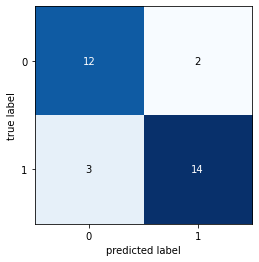

In [41]:
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

### Bayesian Classifier

In [57]:
from sklearn.naive_bayes import GaussianNB

# initializing the model
model_naive_bayes = GaussianNB()

# evaluating the model
cv_score_naive_bayes = cross_val_score(estimator=model_naive_bayes, X=X_train_transform, y=y_train,
                                      cv=10, n_jobs=-1)

print(f'Kfold Accuracy: {np.mean(cv_score_naive_bayes)*100:.2f}%')

Kfold Accuracy: 81.60%
